In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("Bakery sales.csv")

In [ ]:
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [ ]:
df.tail()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"
234004,511395,2022-09-30,18:56,288913.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [ ]:
df.describe()

,Unnamed: 0,ticket_number,Quantity
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,219201.258738,1.538377
std,147501.625992,40053.223896,1.289603
min,0.000000,150040.000000,-200.000000
25%,127979.000000,184754.000000,1.000000
50%,254573.000000,218807.000000,1.000000
75%,382911.000000,253927.000000,2.000000
max,511395.000000,288913.000000,200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [ ]:
df.columns

Index(['Unnamed: 0', 'date', 'time', 'ticket_number', 'article', 'Quantity',
       'unit_price'],
      dtype='object')

The first column gives us the transaction number of the sale. Since we don't need that information I am going to just remove that column.

In [ ]:
df=df.drop(df.columns[0],axis=1)

In [ ]:
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [ ]:
df.shape

(234005, 6)

In [ ]:
df.isnull().sum()

date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

In [ ]:
df.dtypes

date              object
time              object
ticket_number    float64
article           object
Quantity         float64
unit_price        object
dtype: object

In [ ]:
#converting date and time to datetime format
df['date']=pd.to_datetime(df['date'])
df['time']=pd.to_datetime(df['time'],format="%H:%M")

In [ ]:
#changing the unit_price to float
df['unit_price'] = df['unit_price'].replace('[\€ ]', '', regex=True)
df['unit_price']=df['unit_price'].replace('[,]','.',regex=True)
df['unit_price']=df['unit_price'].astype(float)


In [ ]:
df = df[(df['unit_price'] > 0) & (df['Quantity'] > 0)]

In [ ]:
#We create a price column by mutiplying the unit price with the quantity
df['price']=df['Quantity']*df['unit_price']

<ipython-input-65-ff259cbbb095>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price']=df['Quantity']*df['unit_price']


In [ ]:
daily=df.groupby('date').agg({'price':'sum'}).reset_index()

In [ ]:
daily_df=daily.copy()
daily_df

,date,price
0,2021-01-02,987.85
1,2021-01-03,1015.20
2,2021-01-04,461.90
3,2021-01-05,526.10
4,2021-01-07,544.00
...,...,...
595,2022-09-26,695.55
596,2022-09-27,769.00
597,2022-09-28,610.70
598,2022-09-29,698.30


In [ ]:
daily.set_index('date',inplace=True)

In [ ]:
weekly=daily.resample('W').sum()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

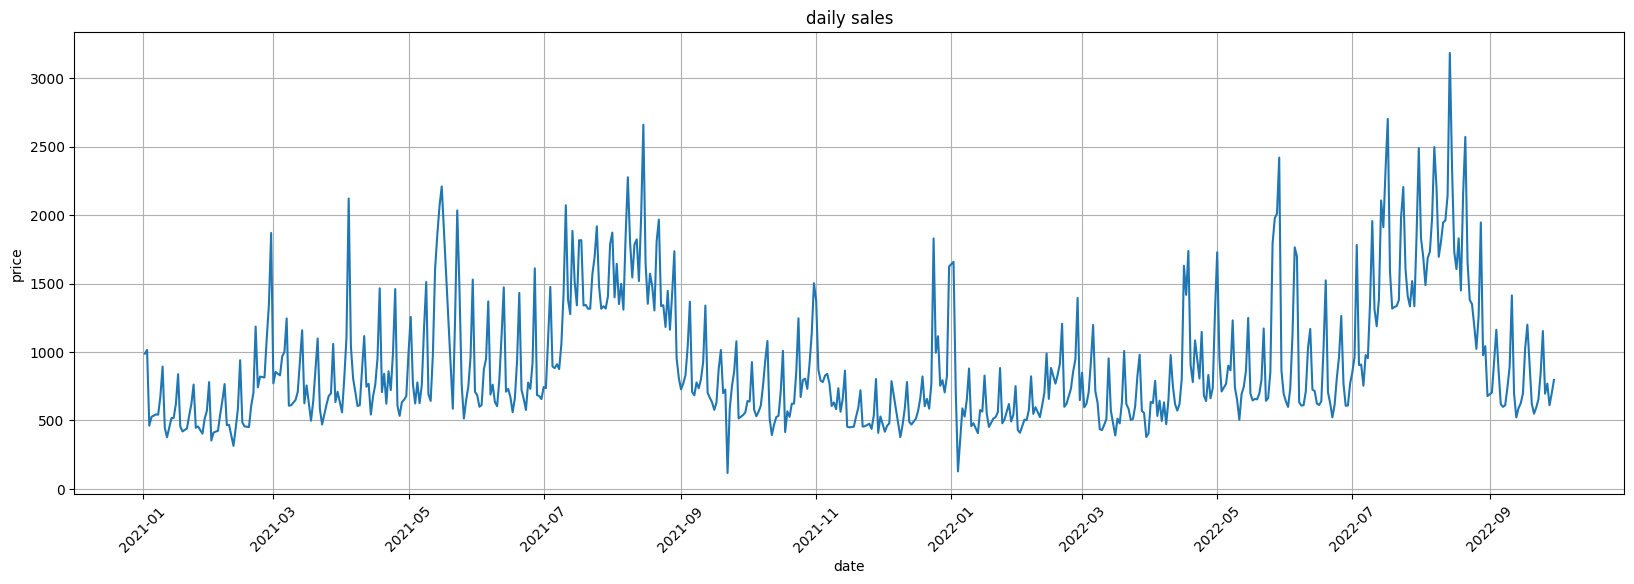

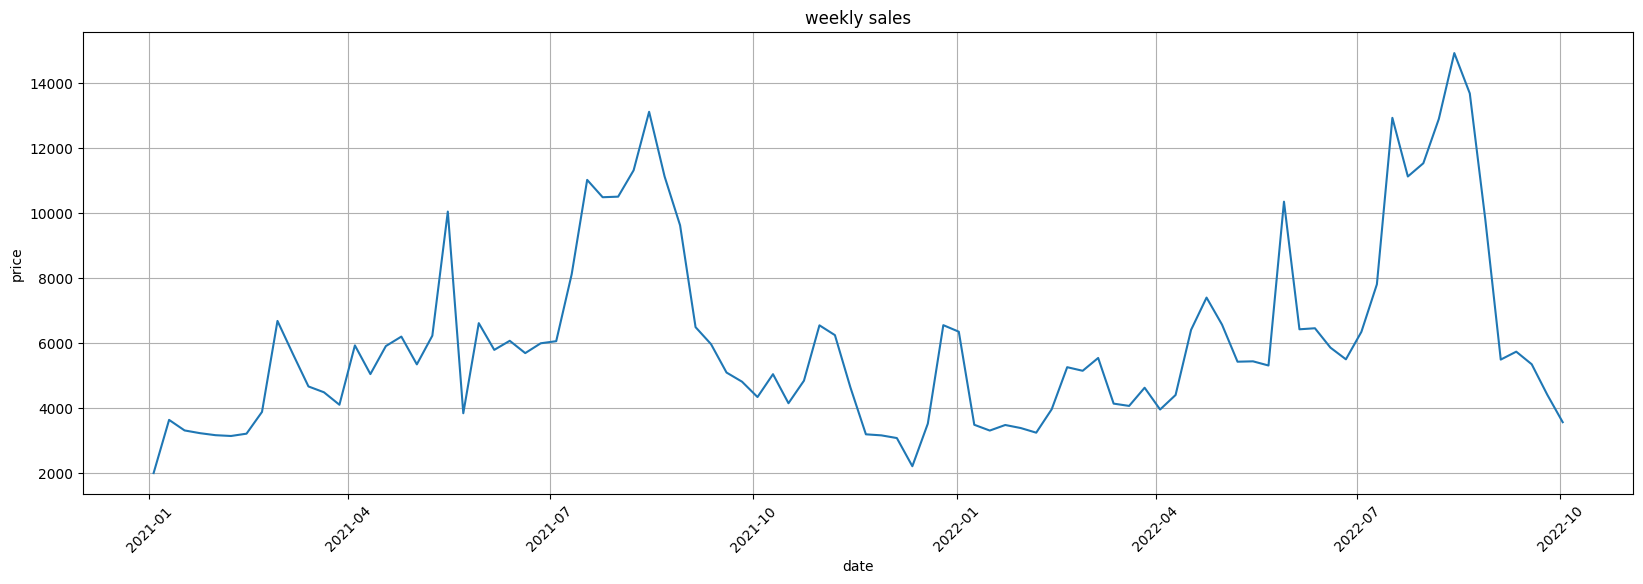

In [ ]:
x1 = daily.index
y1 = daily['price']

x2 = weekly.index
y2 = weekly['price']

plt.figure(figsize=(20, 6))
plt.plot(x1, y1)
plt.title('daily sales')
plt.xlabel('date')
plt.ylabel('price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20, 6))
plt.plot(x2, y2)
plt.title('weekly sales')
plt.xlabel('date')
plt.ylabel('price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

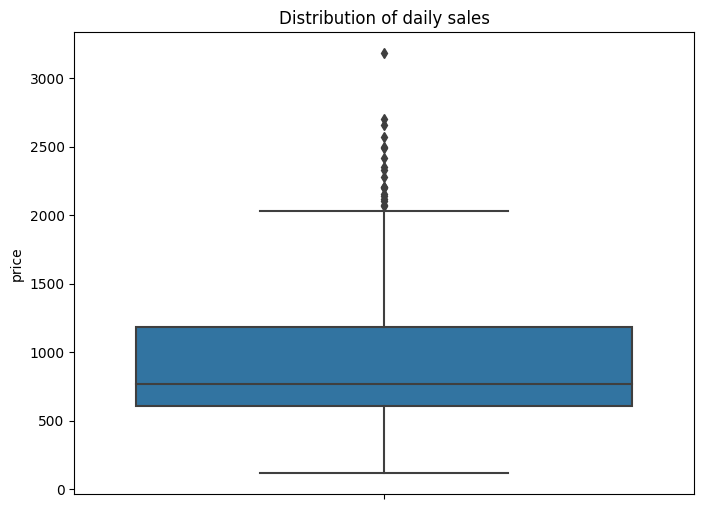

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y="price",data=daily_df)
plt.ylabel("price")
plt.title("Distribution of daily sales")
plt.show()

In [ ]:
daily_df.describe()

,price
count,600.000000
mean,937.861167
std,477.793817
min,116.000000
25%,609.225000
50%,765.125000
75%,1183.137500
max,3184.100000


In [ ]:
#removing outliers
Q1 = daily_df['price'].quantile(0.25)
Q3 = daily_df['price'].quantile(0.75)
IQR = Q3 - Q1
Min=Q1-(1.5)*IQR
Max=Q3+(1.5)*IQR
daily_df=daily_df[(daily_df['price']<Max)&(daily_df['price']>Min)]
daily_df

,date,price
0,2021-01-02,987.85
1,2021-01-03,1015.20
2,2021-01-04,461.90
3,2021-01-05,526.10
4,2021-01-07,544.00
...,...,...
595,2022-09-26,695.55
596,2022-09-27,769.00
597,2022-09-28,610.70
598,2022-09-29,698.30


In [ ]:
df['day'] = pd.Categorical(df.date.dt.day_name(), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [ ]:
date_weekdays = df.drop_duplicates('date')[['date', 'day']]

tickets_by_day = (df
    .drop_duplicates('ticket_number')
    .groupby('date')['ticket_number']
    .count()
    .reset_index()
    .merge(date_weekdays)
    .groupby('day')
    .mean('ticket_number')
)
tickets_by_day

,ticket_number
day,
Monday,225.329545
Tuesday,206.191011
Wednesday,211.532258
Thursday,209.393258
Friday,203.230769
Saturday,236.877778
Sunday,285.065934


<function matplotlib.pyplot.show(close=None, block=None)>

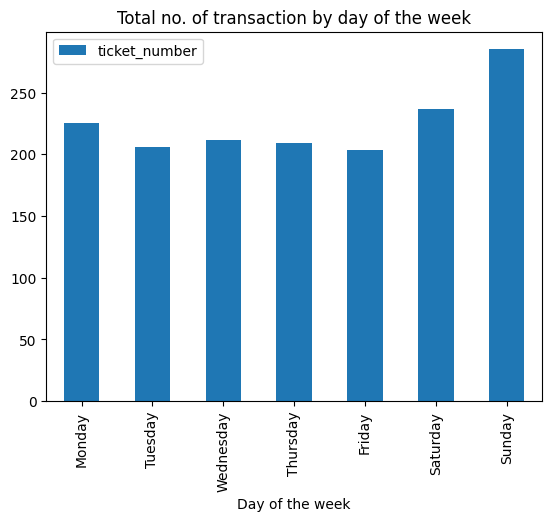

In [ ]:
tickets_by_day.plot(kind='bar')
plt.xlabel('Day of the week')
plt.title('Total no. of transaction by day of the week')
plt.show

In [ ]:
articles_sold=df.groupby('article', as_index=False)\
.agg(sum_cout=('Quantity', 'sum'), total_sum=('price', 'sum'))\
.sort_values('total_sum', ascending=False).iloc[:20].reset_index(drop=True)
articles_sold

,article,sum_cout,total_sum
0,TRADITIONAL BAGUETTE,118093.0,145533.75
1,FORMULE SANDWICH,5285.0,35419.50
2,CROISSANT,29822.0,33770.45
3,PAIN AU CHOCOLAT,25367.0,31262.15
4,BANETTE,22870.0,24704.30
5,BAGUETTE,22156.0,20578.20
6,SANDWICH COMPLET,2911.0,13659.50
7,SPECIAL BREAD,5488.0,13498.60
8,TRAITEUR,1462.0,12368.40
9,GRAND FAR BRETON,1496.0,10786.00


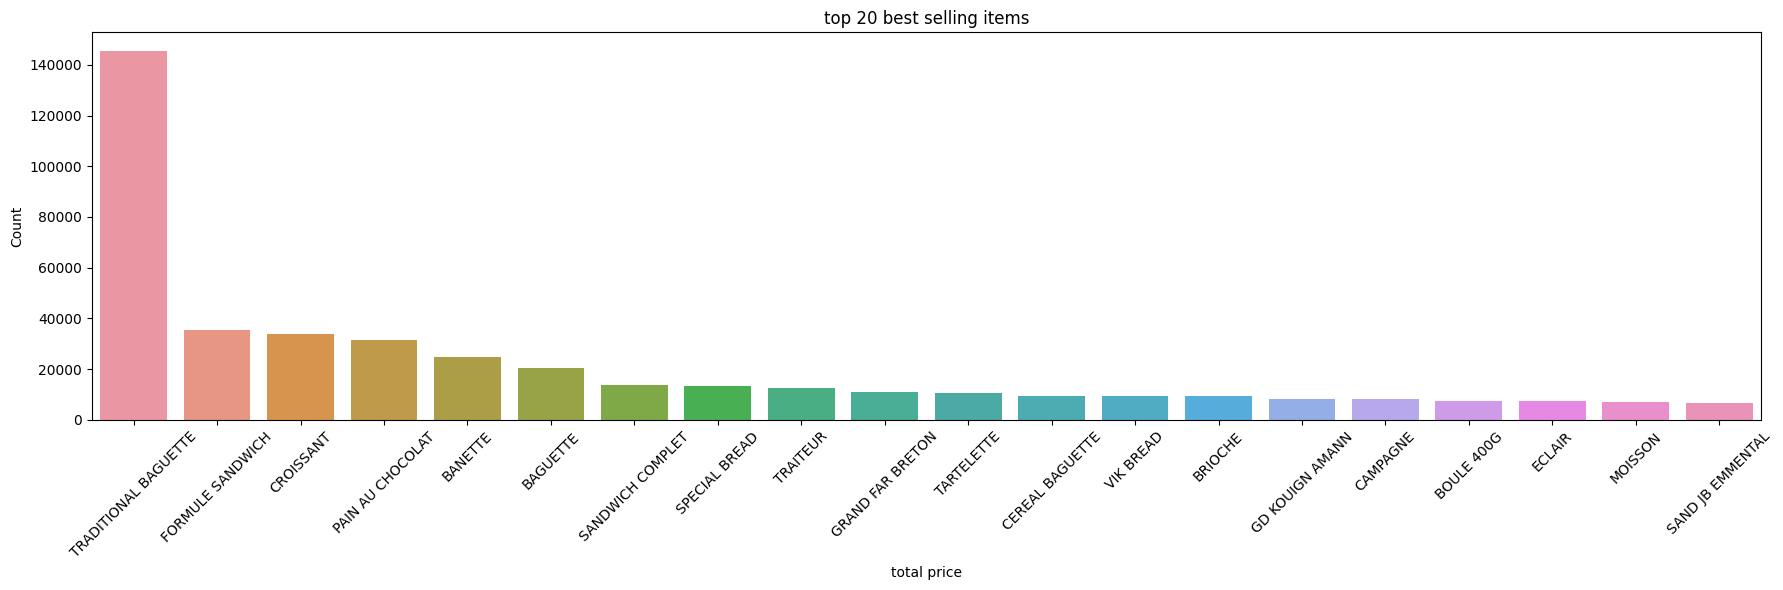

In [ ]:
plt.figure(figsize=(18, 6))
sns.barplot(x='article',y='total_sum', data=articles_sold)
plt.xlabel("total price")
plt.ylabel("Count")
plt.title("top 20 best selling items")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# correlation matrix
df.corr()

<ipython-input-80-a32c6888aa4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ticket_number,Quantity,unit_price,price
ticket_number,1.000000,0.005814,0.033338,0.037485
Quantity,0.005814,1.000000,-0.080088,0.528204
unit_price,0.033338,-0.080088,1.000000,0.725911
price,0.037485,0.528204,0.725911,1.000000


<ipython-input-81-9e08b3779b4d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


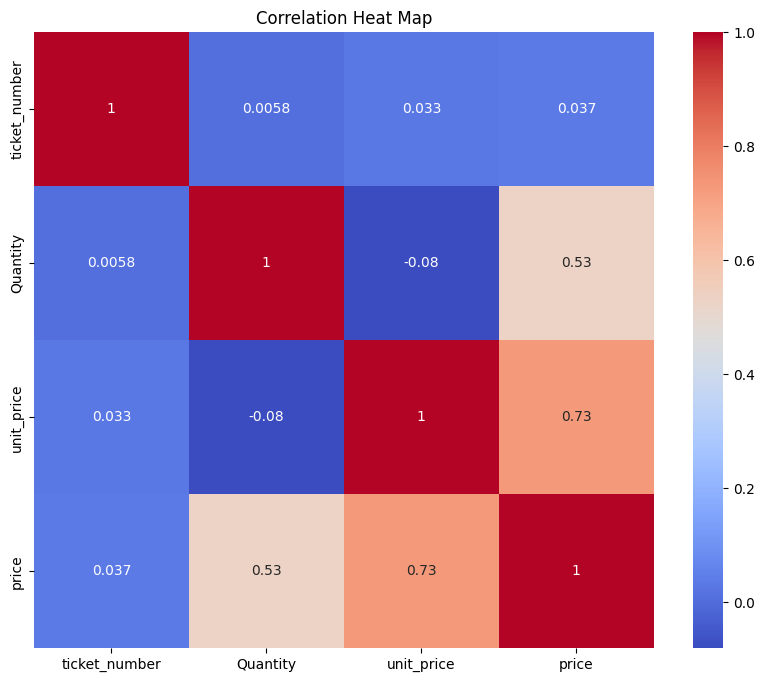

In [ ]:
# Creating a heat map with Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heat Map")
plt.show()

In [ ]:
daily_df.shape

(581, 2)

In [ ]:
daily_df.iloc[0,:]

date     2021-01-02 00:00:00
price                 987.85
Name: 0, dtype: object

In [ ]:
daily_df.iloc[462,:]

date     2022-05-20 00:00:00
price                  694.3
Name: 468, dtype: object

In [ ]:
start_date='2021-01-02'
end_date='2022-05-20'
daily_dfnew=daily_df.copy()
mask = (daily_dfnew['date']>=start_date) & (daily_dfnew['date'] <= end_date)
dftrain= daily_dfnew.loc[mask]
dftrain

,date,price
0,2021-01-02,987.85
1,2021-01-03,1015.20
2,2021-01-04,461.90
3,2021-01-05,526.10
4,2021-01-07,544.00
...,...,...
464,2022-05-16,695.60
465,2022-05-17,645.95
466,2022-05-18,656.90
467,2022-05-19,654.05


In [ ]:
start_date='2022-05-21'
end_date='2022-09-30'
mask = (daily_dfnew['date']>=start_date) & (daily_dfnew['date'] <= end_date)
dftest= daily_dfnew.loc[mask]
dftest

,date,price
469,2022-05-21,796.60
470,2022-05-22,1171.45
471,2022-05-23,643.25
472,2022-05-24,662.60
473,2022-05-25,852.85
...,...,...
595,2022-09-26,695.55
596,2022-09-27,769.00
597,2022-09-28,610.70
598,2022-09-29,698.30


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

In [ ]:
# ADF Test
result = adfuller(dftrain['price'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.567022910267667
n_lags: 0.10000628352461938
p-value: 0.10000628352461938
Critial Values:
   1%, -3.4449982835447894
Critial Values:
   5%, -2.8679986379826814
Critial Values:
   10%, -2.5702102140862397


In [ ]:
# Perform KPSS test
kpss_stat, p_value, lags, critical_values = kpss(dftrain['price'], nlags='auto')

# Print the results
print(f'KPSS Statistic: {kpss_stat}')
print(f'P-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'  {key}: {value}')

# Check for non-stationarity based on the p-value and significance level (e.g., 0.05)
if p_value < 0.05:
    print('The time series is non-stationary (reject the null hypothesis).')
else:
    print('The time series is stationary (fail to reject the null hypothesis).')

KPSS Statistic: 0.43717860068770376
P-value: 0.06112991349667942
Critical Values:
  10%: 0.347
  5%: 0.463
  2.5%: 0.574
  1%: 0.739
The time series is stationary (fail to reject the null hypothesis).


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

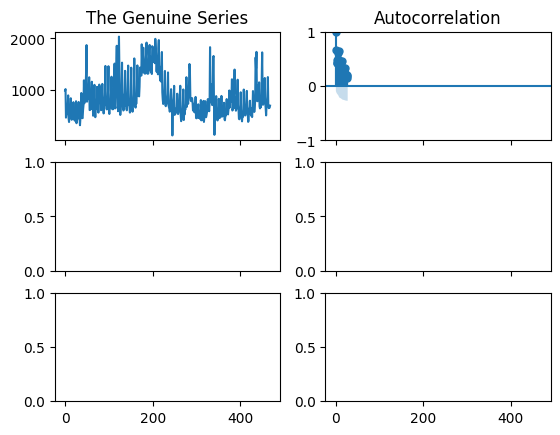

In [ ]:
fig, axes = plt.subplots(3, 2, sharex = True)
axes[0, 0].plot(dftrain['price'])
axes[0, 0].set_title('The Genuine Series')
plot_acf(dftrain['price'], ax = axes[0, 1]);

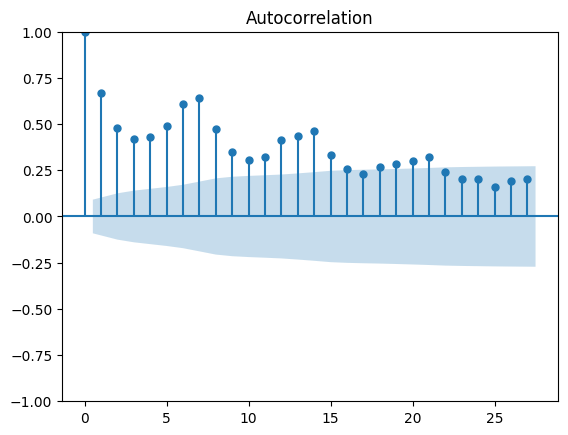

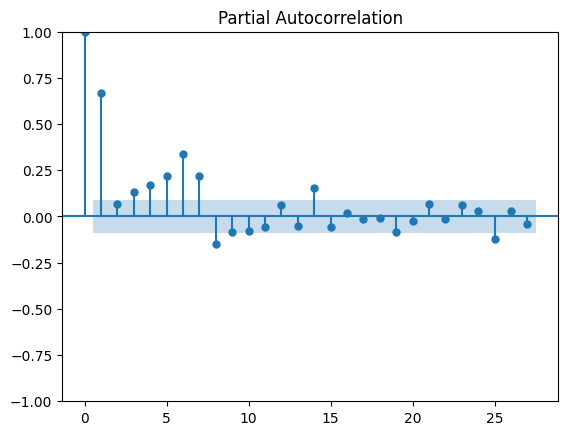

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Optimal (p, d, q) values: (2, 1, 2)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Prepare the data
dates = pd.to_datetime(dftrain['price'])
values =dftrain['price']
series = pd.Series(values.values, index=dates)

# Determine the optimal values for p and q using ACF and PACF plots
plot_acf(series)
plt.show()

plot_pacf(series)
plt.show()

# Grid search to find the optimal values for p, d, and q
best_aic = np.inf
best_order = None

for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(series, order=(p, d, q))
                model_fit = model.fit()
                aic = model_fit.aic

                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, d, q)
            except:
                continue
print(f"Optimal (p, d, q) values: {best_order}")

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare the data
dates = pd.to_datetime(dftrain['price'])
values = dftrain['price']
series = pd.Series(values.values, index=dates)

# Fit the ARIMA model
order = (3,2,3)
model = ARIMA(dftrain['price'], order=order)
model_fit = model.fit()

print(model_fit.summary())
predictions = model_fit.predict()

# Forecast the next 39 values
forecast = model_fit.forecast(steps=118)

# Print the forecasted values
print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  463
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -3210.936
Date:                Sat, 07 Oct 2023   AIC                           6435.872
Time:                        04:53:20   BIC                           6464.806
Sample:                             0   HQIC                          6447.264
                                - 463                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8070      0.088      9.124      0.000       0.634       0.980
ar.L2         -0.4678      0.070     -6.730      0.000      -0.604      -0.332
ar.L3         -0.2450      0.062     -3.976      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error

In [ ]:
mae = mean_absolute_error(dftrain['price'], predictions)
print("MAE:", mae)
mape = mean_absolute_percentage_error(dftrain['price'],predictions) * 100
print("MAPE:", mape)

MAE: 189.97554217177807
MAPE: 24.562786247070985


In [ ]:
mae = mean_absolute_error((daily_df['price'])[:118], forecast)
print("MAE:", mae)
mape = mean_absolute_percentage_error((daily_df['price'])[:118],forecast) * 100
print("MAPE:", mape)

MAE: 215.6530446616501
MAPE: 27.877763636957837


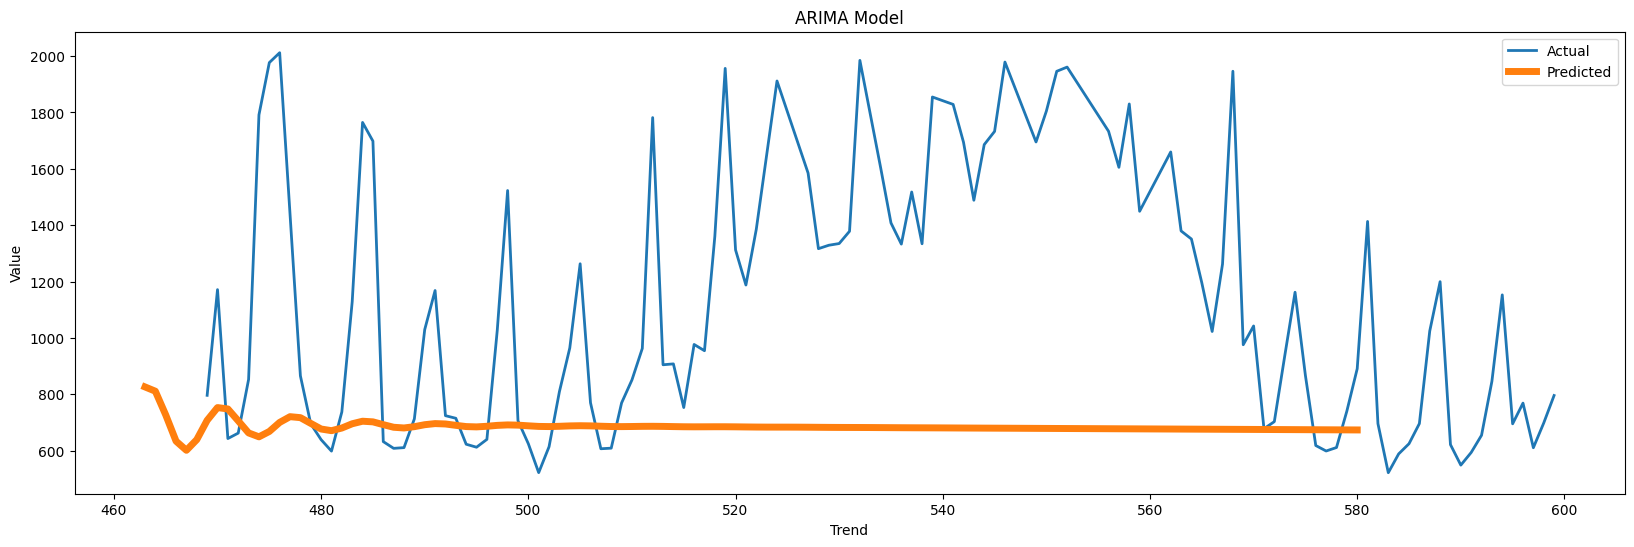

In [ ]:
#Plot the results
plt.figure(figsize=(20,6))
plt.plot(dftest['price'], label='Actual',linewidth=2)
plt.plot(forecast, label='Predicted',linewidth=5)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('ARIMA Model')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, mean_absolute_error, r2_score

# Rename the columns to 'ds' and 'y' for the time series data and target variable
#dftrainnew = dftrainnew.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
dftrain = dftrain.rename(columns={'date': 'ds', 'price':'y'})

# Initialize the Prophet model
model = Prophet(yearly_seasonality=True,seasonality_mode="multiplicative")
model.add_seasonality(name='yearly', period=52, fourier_order=10)


# Fit the model to the data
model.fit(dftrain)

# Make predictions
forecast = model.predict()

actual_values = dftrain['y'].values
predicted_values = forecast['yhat'].values

# Print the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptoaup5ba/6ddti9w7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptoaup5ba/llj_wxle.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74671', 'data', 'file=/tmp/tmptoaup5ba/6ddti9w7.json', 'init=/tmp/tmptoaup5ba/llj_wxle.json', 'output', 'file=/tmp/tmptoaup5ba/prophet_modelshtpg8mt/prophet_model-20231007045428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:54:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:54:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


            ds         yhat  yhat_lower   yhat_upper
0   2021-01-02   915.916684  696.917584  1141.123113
1   2021-01-03  1197.226224  977.372103  1422.654885
2   2021-01-04   676.810647  436.731354   886.393531
3   2021-01-05   608.856147  385.567710   841.550943
4   2021-01-07   588.941404  357.310907   832.529895
..         ...          ...         ...          ...
458 2022-05-16   835.390234  598.303366  1043.157260
459 2022-05-17   794.404857  565.621010  1021.649758
460 2022-05-18   739.152929  510.649806   960.755034
461 2022-05-19   818.491912  574.004124  1042.583959
462 2022-05-20   891.109428  657.953642  1107.625946

[463 rows x 4 columns]


In [ ]:
mae = mean_absolute_error(actual_values, predicted_values)
print("MAE:", mae)
mape = mean_absolute_percentage_error(actual_values,predicted_values) * 100
print("MAPE:", mape)

MAE: 122.00075771301793
MAPE: 16.457435199489588


In [ ]:
dftrain = dftrain.rename(columns={'ds': 'date', 'y':'price'})

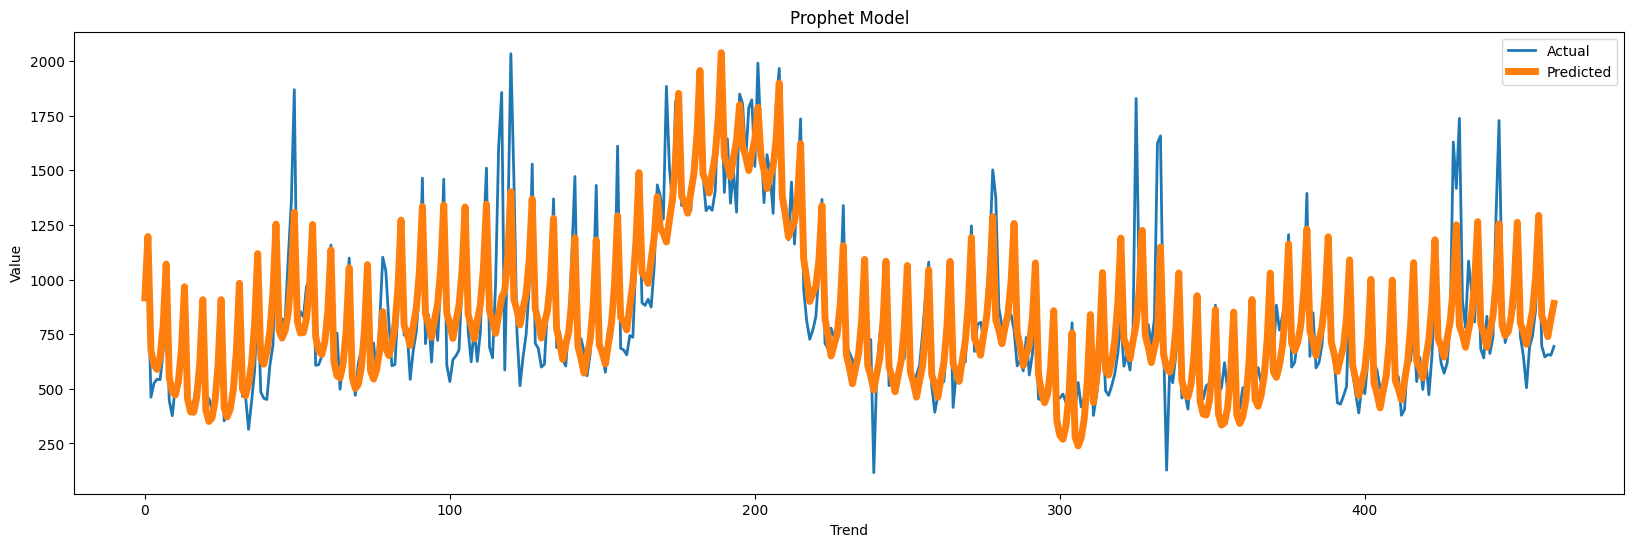

In [ ]:
#Plot the results
plt.figure(figsize=(20,6))
plt.plot(actual_values, label='Actual',linewidth=2)
plt.plot(predicted_values, label='Predicted',linewidth=5)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('Prophet Model')
plt.legend()
plt.show()

In [ ]:
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# Create a pandas series with the data
series = pd.Series(dftrain['price'])

# Perform Holt-Winters forecasting
model = ExponentialSmoothing(series, seasonal_periods=52, trend='add', seasonal='mul')
fit_model = model.fit()

# Forecast the next 36 values
forecast = fit_model.forecast(118)

# Print the forecasted values
print(forecast)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


463    588.668440
464    686.418371
465    775.496292
466    602.595040
467    757.656331
          ...    
576    555.082650
577    508.398924
578    607.849269
579    681.714282
580    583.121392
Length: 118, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
mae = mean_absolute_error((daily_df['price'])[:118], forecast)
print("MAE:", mae)
mape = mean_absolute_percentage_error((daily_df['price'])[:118],forecast) * 100
print("MAPE:", mape)

MAE: 242.83977303691032
MAPE: 30.486793467699357


<function matplotlib.pyplot.show(close=None, block=None)>

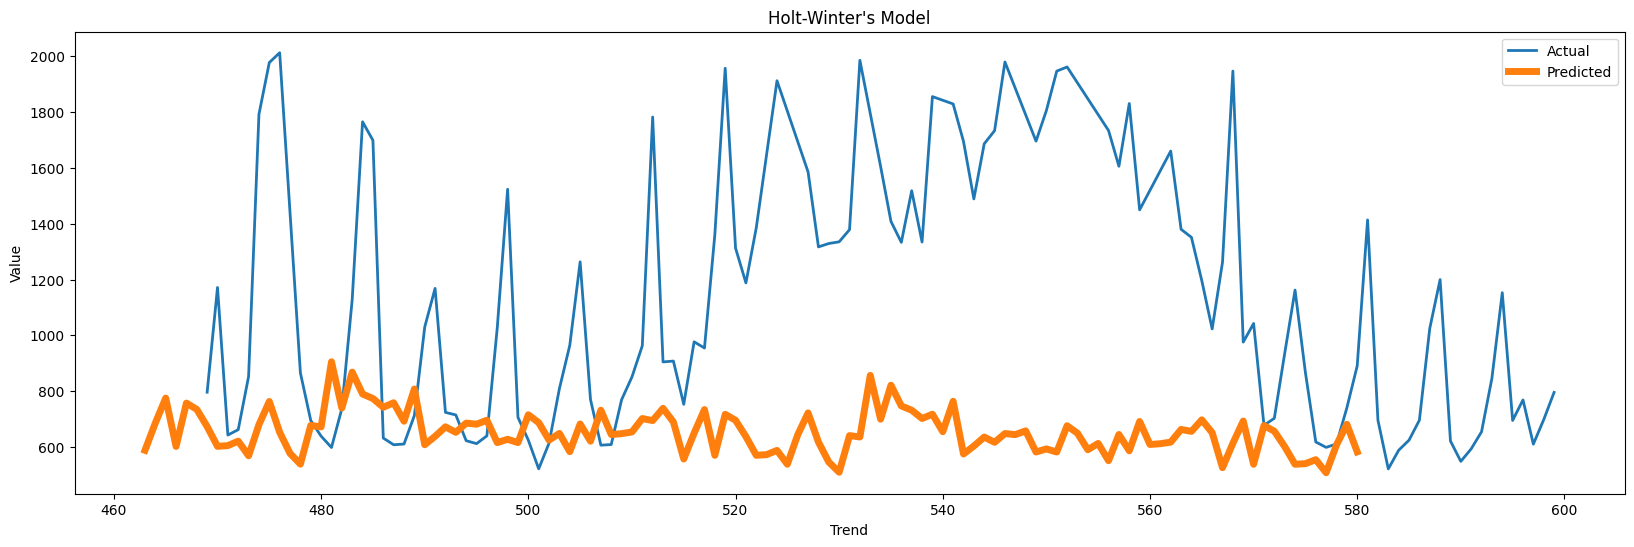

In [ ]:
#Plot the results
plt.figure(figsize=(20,6))
plt.plot(dftest['price'], label='Actual',linewidth=2)
plt.plot(forecast, label='Predicted',linewidth=5)

plt.xlabel('Trend')
plt.ylabel('Value')
plt.title('Holt-Winter\'s Model')
plt.legend()
plt.show